In [60]:
import pandas as pd
import itertools
import EoN as eon
import matplotlib.pyplot as plt
import random
import matplotlib.colors as mcolors
import itertools

In [1]:
# url="https://snap.stanford.edu/data/twitch.zip"
# !curl -O https://snap.stanford.edu/data/twitch.zip

In [2]:
# !unzip twitch.zip

In [24]:
COUNTRY_CODE = "DE"

In [25]:
GRAPH_DIR = "twitch/" + COUNTRY_CODE

In [26]:
edges = pd.read_csv(GRAPH_DIR + "/musae_" + COUNTRY_CODE +"_edges.csv")

In [27]:
edges.max()

from    9488
to      9497
dtype: int64

In [28]:
edges

,from,to
0,0,9206
1,0,7787
2,0,2145
3,0,2684
4,0,7275
...,...,...
153133,2547,2092
153134,9461,2092
153135,9295,7802
153136,7436,9487


In [29]:
nodes = pd.read_csv(GRAPH_DIR + "/musae_" + COUNTRY_CODE + "_target.csv",index_col="new_id")

In [30]:
nodes

,id,days,mature,views,partner
new_id,,,,,
5079,37905227,2149,True,162078,False
4281,63102384,1574,True,1370,False
992,109414094,1034,True,6043,False
9021,84163849,1319,True,94298,True
330,38240837,2137,True,2323,False
...,...,...,...,...,...
4572,123101102,895,True,128,False
6355,40627165,2001,False,44,False
206,50643307,1784,True,2038,False


In [32]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(edges, source='from', target='to', create_using=Graphtype)

## SIR and SIS model on twitch users network using EoN python library

In [123]:
print("Density of graph G: ",nx.density(G))

Density of graph G:  0.0033954267301620203


In [124]:
degrees = list(G.degree())

In [125]:
degrees.sort(key=lambda x: x[1])

In [126]:
degrees[:10]

[(7, 1),
 (12, 1),
 (5408, 1),
 (5918, 1),
 (37, 1),
 (41, 1),
 (53, 1),
 (59, 1),
 (62, 1),
 (68, 1)]

In [127]:
degrees[-10:]

[(8262, 1125),
 (4927, 1246),
 (5893, 1257),
 (8803, 1324),
 (2816, 1333),
 (2914, 1357),
 (1638, 1433),
 (2684, 1716),
 (9206, 1825),
 (7787, 4259)]

In [128]:
print("Is G a connected graph?", (lambda x: "YES" if x else "NO")(nx.is_connected(G)))

Is G a connected graph? YES


Text(0, 0.5, 'Frequency')

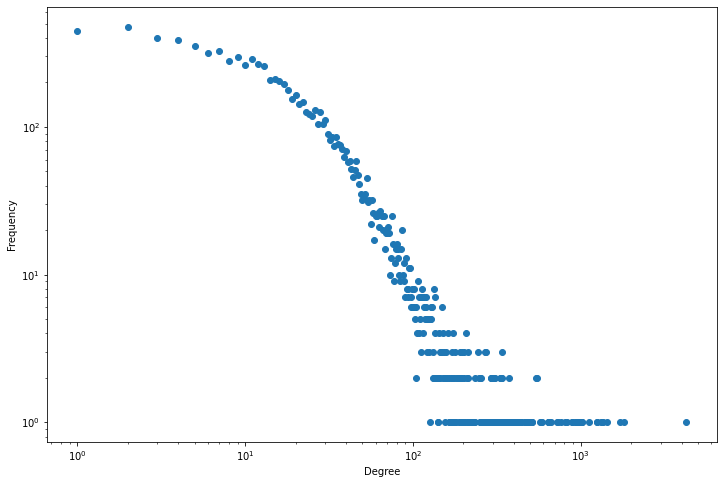

In [41]:
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq,'o') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [55]:
colors = list(mcolors.cnames.keys())
random.shuffle(colors)

In [56]:
colors[:5]

['rebeccapurple', 'steelblue', 'darkseagreen', 'whitesmoke', 'olive']

In [57]:
len(colors)

148

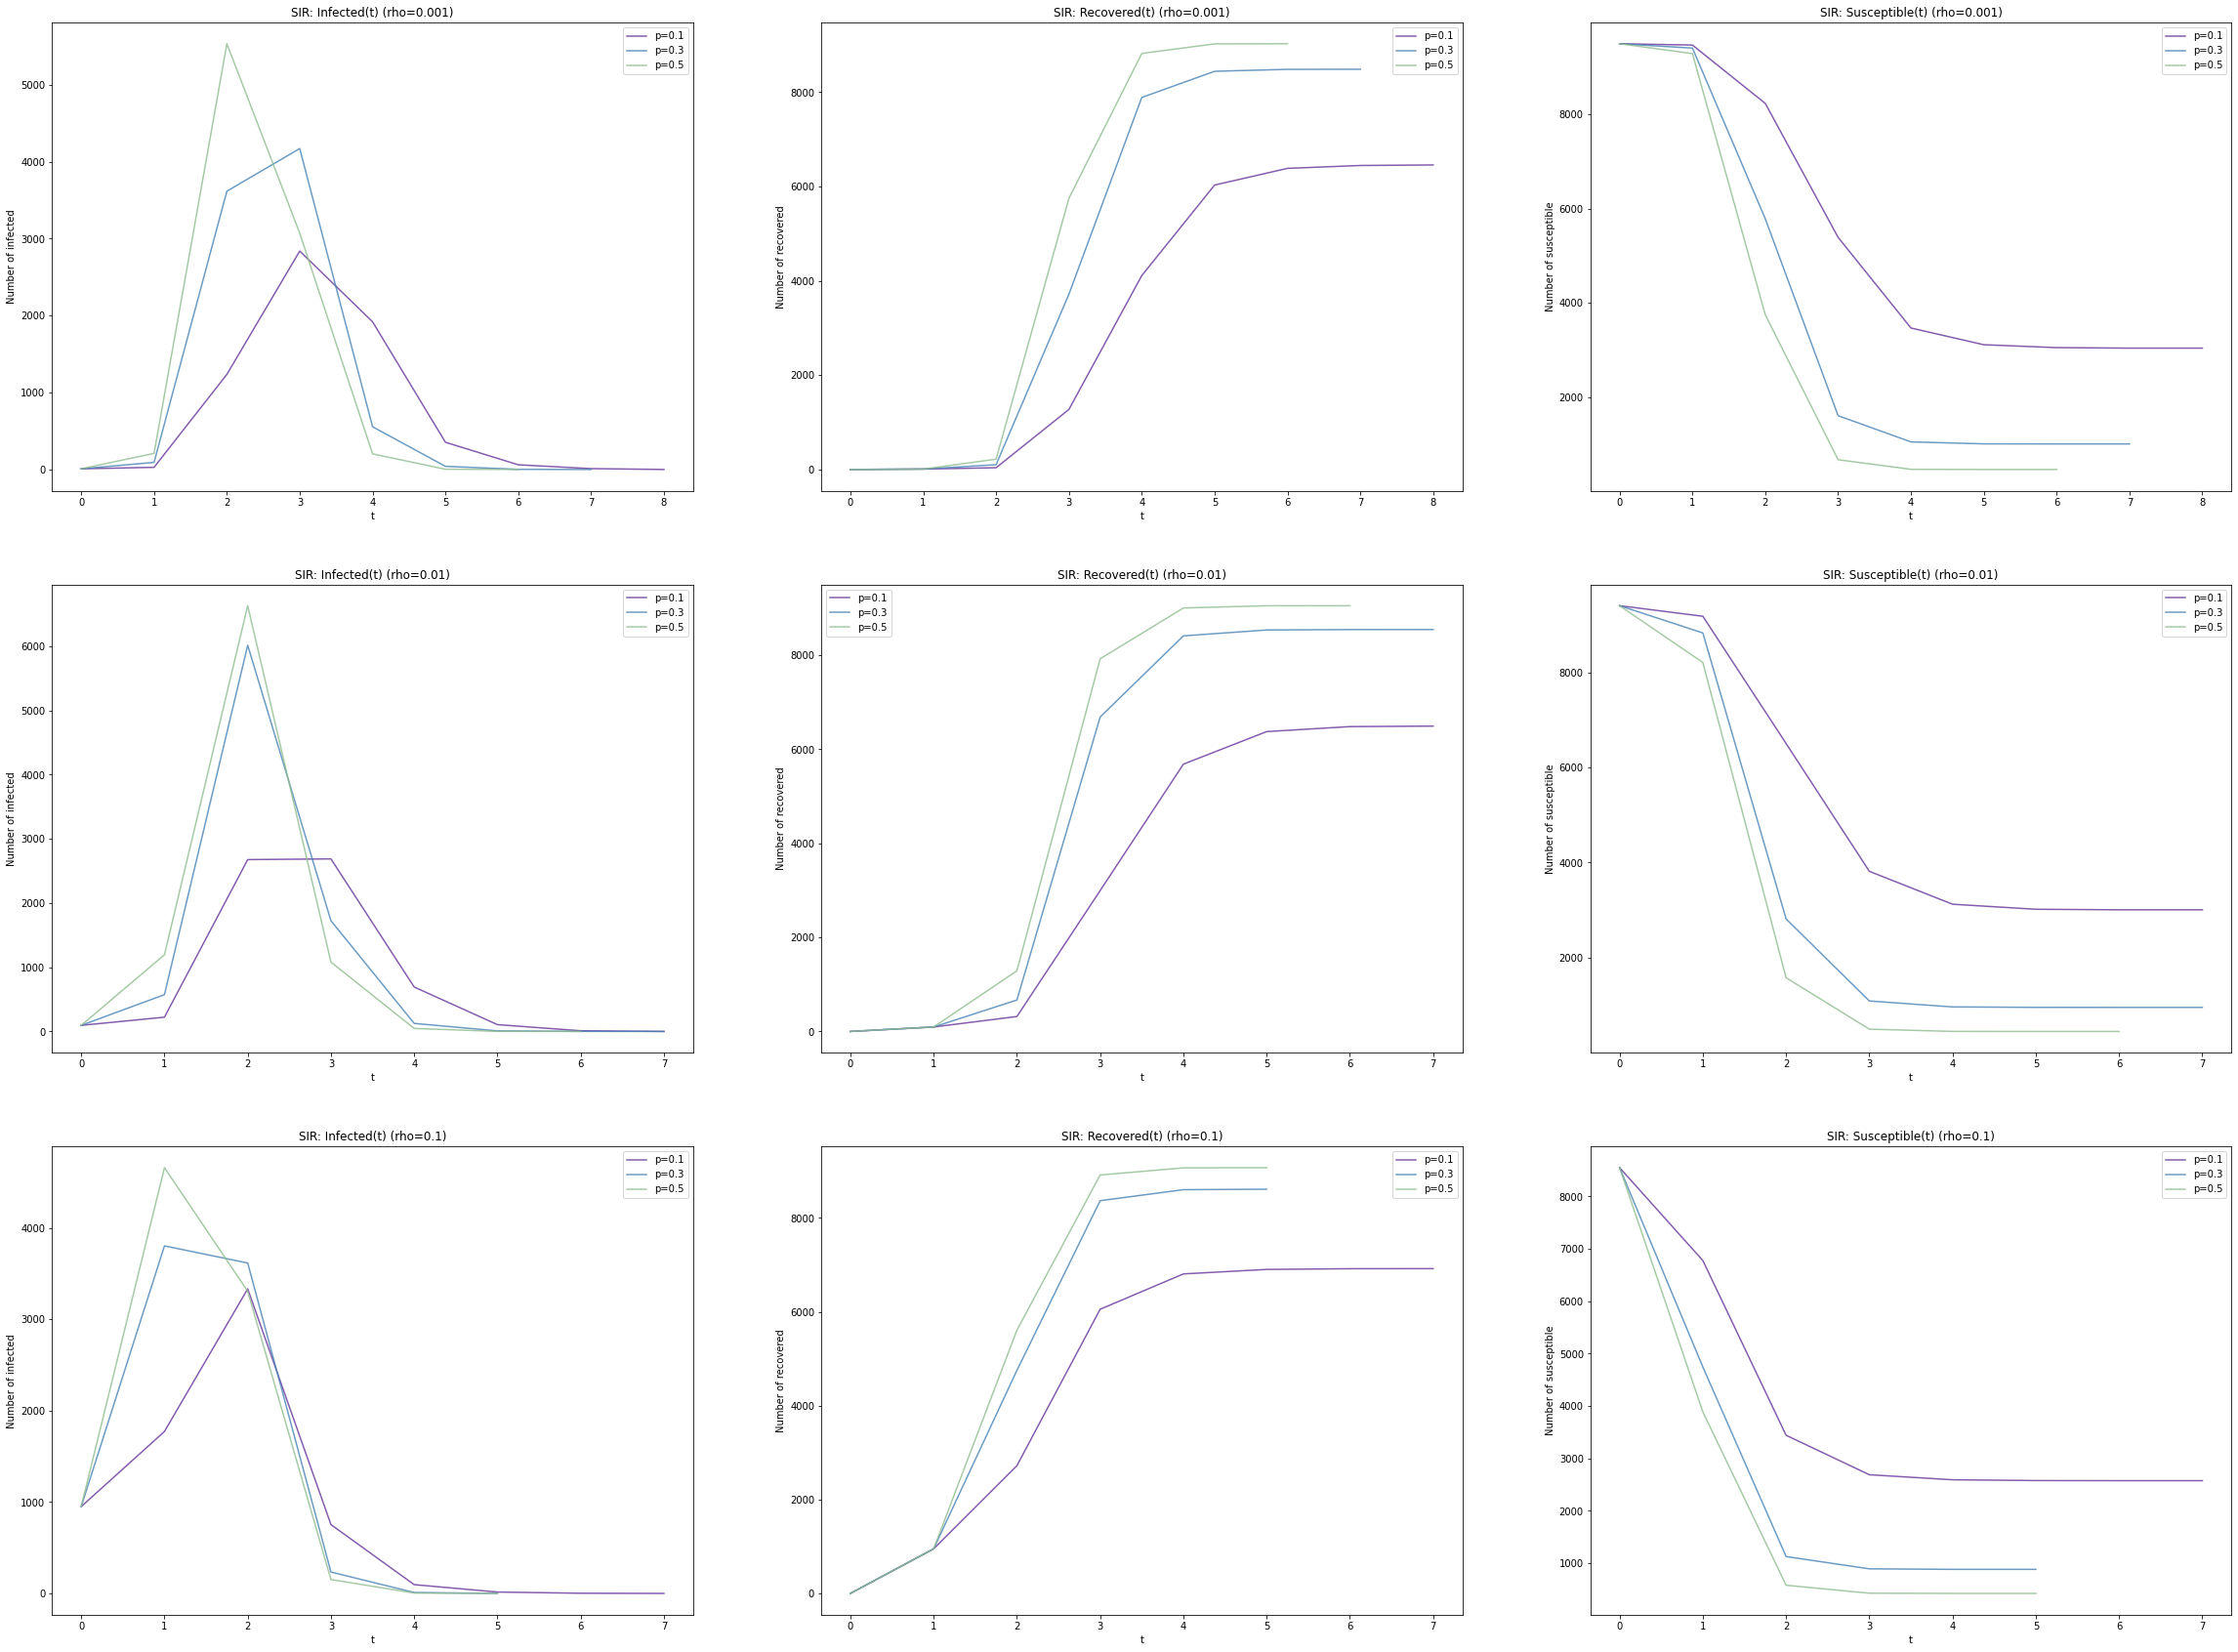

In [65]:
%matplotlib inline
ps = [0.1,0.3,0.5] #transmission probability
rhos = [0.001,0.01,0.1] #random fraction initially infected

fig, axs = plt.subplots(len(rhos),3)
fig.set_size_inches(40, 30)

for i,rho in enumerate(rhos):
    axs[i][0].set_title(f"SIR: Infected(t) (rho={rho})")
    axs[i][0].set_xlabel("t")
    axs[i][0].set_ylabel("Number of infected")

    axs[i][1].set_title(f"SIR: Recovered(t) (rho={rho})")
    axs[i][1].set_xlabel("t")
    axs[i][1].set_ylabel("Number of recovered")

    axs[i][2].set_title(f"SIR: Susceptible(t) (rho={rho})")
    axs[i][2].set_xlabel("t")
    axs[i][2].set_ylabel("Number of susceptible")
    
for i,rho in enumerate(rhos): 
    for j,p in enumerate(ps): 
        t, S, I, R = eon.basic_discrete_SIR(G, p, rho=rho)
        axs[i][0].plot(t, I, color = colors[j], label=f"p={p}", alpha=0.8)
        axs[i][1].plot(t, R, color = colors[j], label=f"p={p}", alpha=0.8)
        axs[i][2].plot(t, S, color = colors[j], label=f"p={p}", alpha=0.8)
        axs[i][0].legend()
        axs[i][1].legend()
        axs[i][2].legend()
        
plt.show()

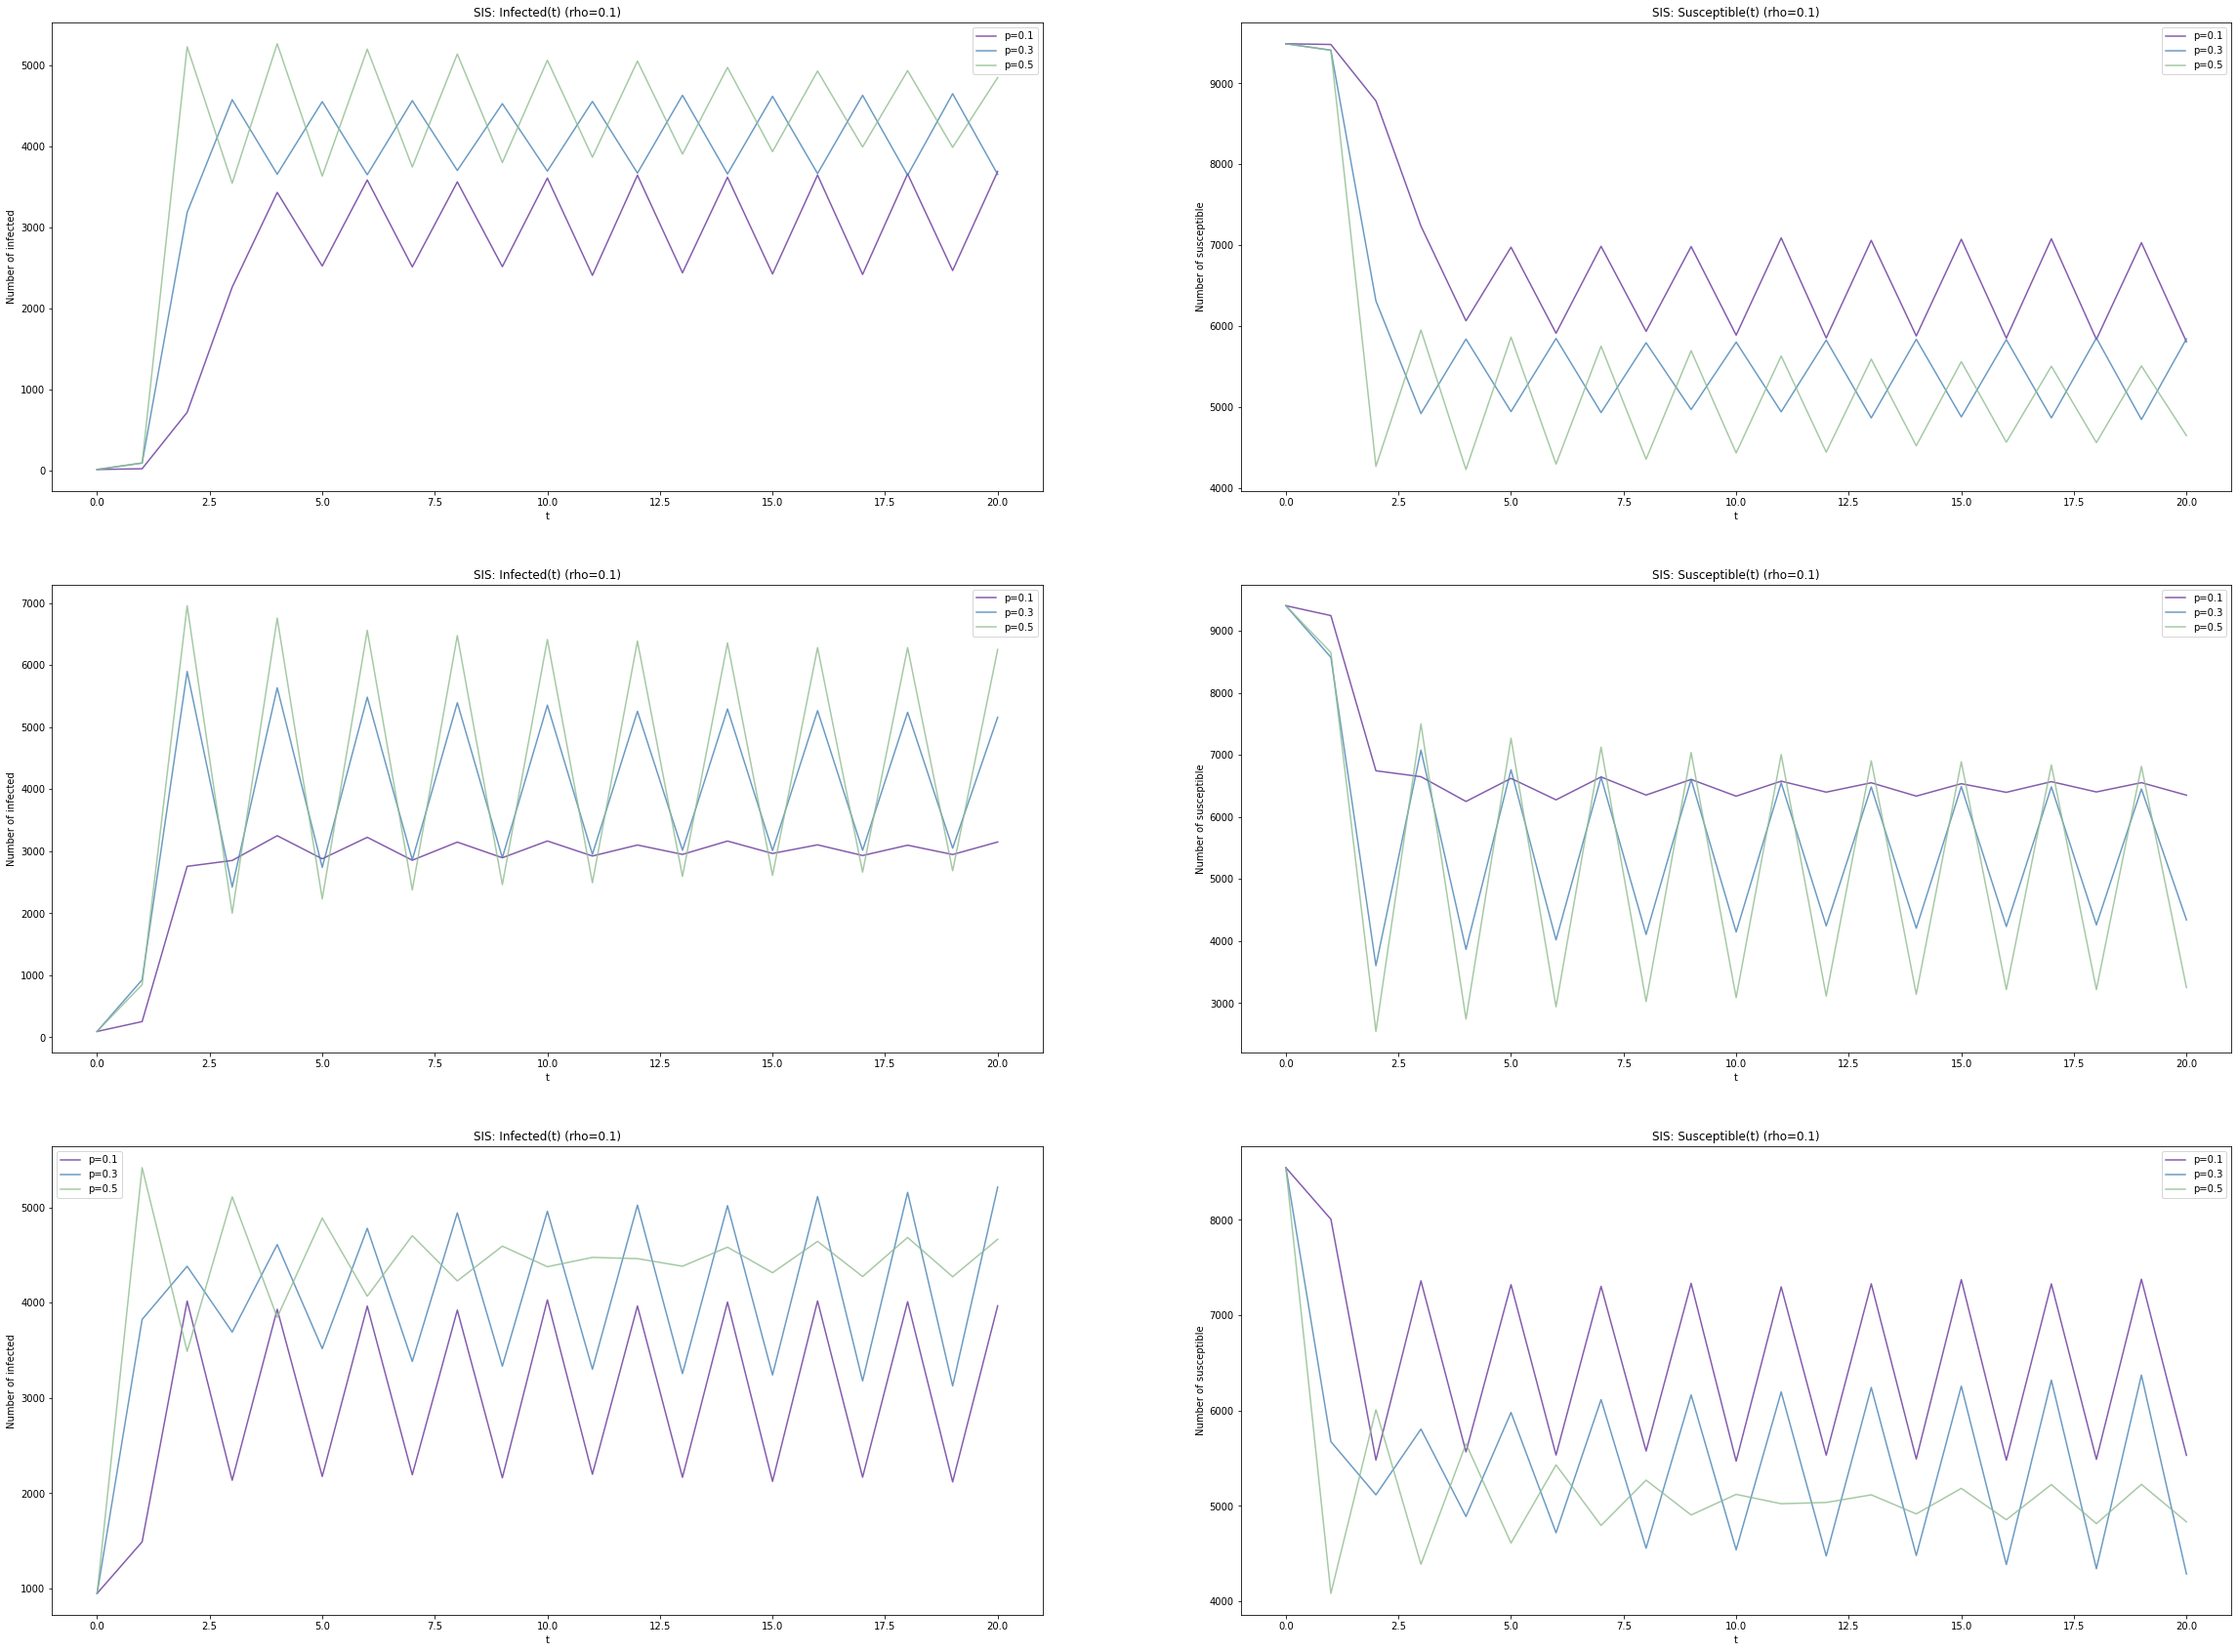

In [64]:
%matplotlib inline
ps = [0.1,0.3,0.5] #transmission probability
rhos = [0.001,0.01,0.1] #random fraction initially infected

fig, axs = plt.subplots(len(rhos),2)
fig.set_size_inches(40, 30)

for i,p in enumerate(rhos):
    axs[i][0].set_title(f"SIS: Infected(t) (rho={rho})")
    axs[i][0].set_xlabel("t")
    axs[i][0].set_ylabel("Number of infected")

    axs[i][1].set_title(f"SIS: Susceptible(t) (rho={rho})")
    axs[i][1].set_xlabel("t")
    axs[i][1].set_ylabel("Number of susceptible")
    
for i,rho in enumerate(rhos): 
    for j,p in enumerate(ps): 
        t, S, I = eon.basic_discrete_SIS(G, p, rho=rho, tmax=20)
        axs[i][0].plot(t, I, color = colors[j], label=f"p={p}", alpha=0.8)
        axs[i][1].plot(t, S, color = colors[j], label=f"p={p}", alpha=0.8)
        axs[i][0].legend()
        axs[i][1].legend()
        
plt.show()

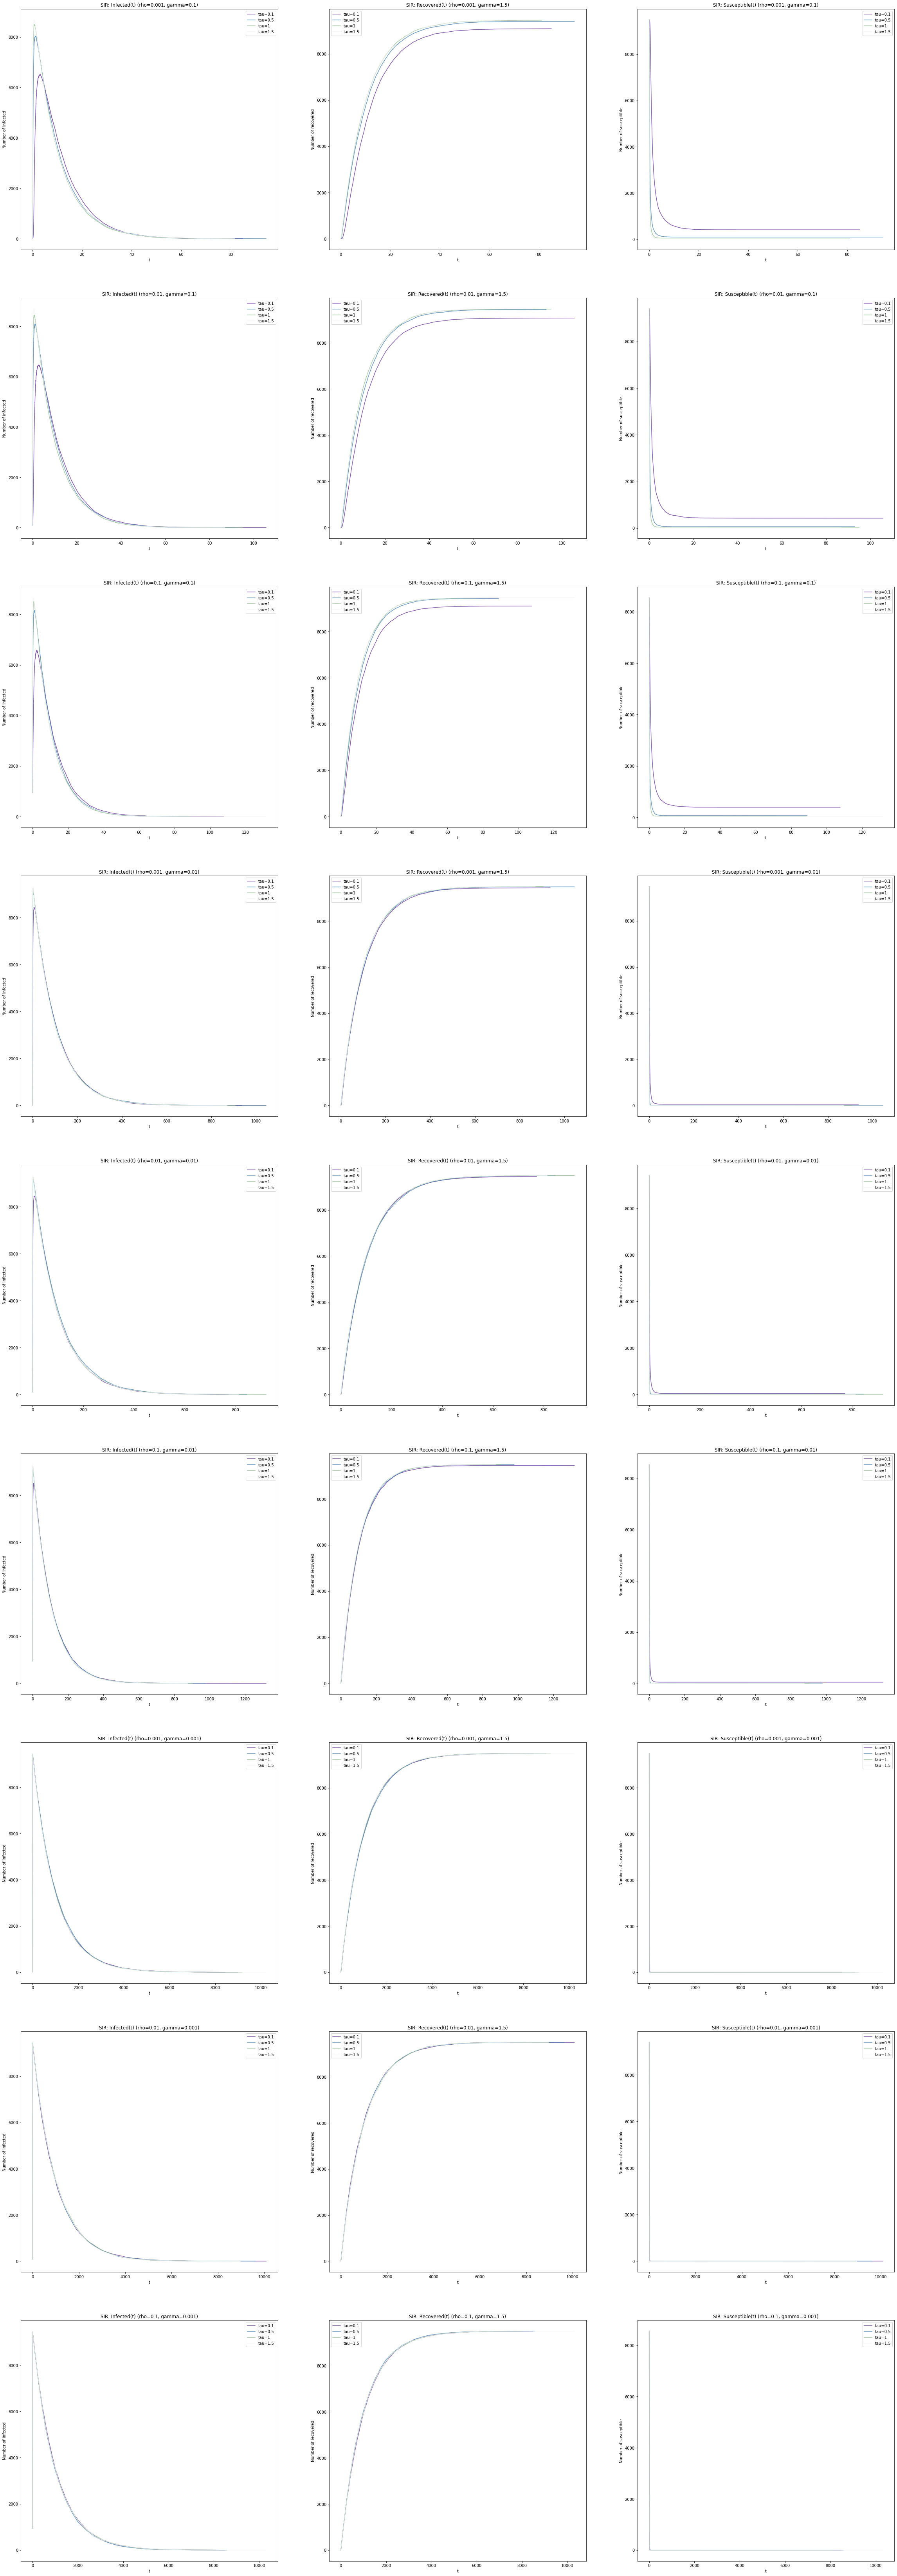

In [ ]:
%matplotlib inline
taus = [0.1,0.5,1,1.5] # transmission rate
rhos = [0.001,0.01,0.1] # random fraction initially infected
gammas = [0.1,0.01,0.001] # recovery rate

gammas_and_rhos = list(itertools.product(gammas, rhos))

fig, axs = plt.subplots(len(rhos)*len(gammas),3)
fig.set_size_inches(40, 120)

for i,(gamma,rho) in enumerate(gammas_and_rhos):
    axs[i][0].set_title(f"SIR: Infected(t) (rho={rho}, gamma={gamma})")
    axs[i][0].set_xlabel("t")
    axs[i][0].set_ylabel("Number of infected")

    axs[i][1].set_title(f"SIR: Recovered(t) (rho={rho}, gamma={tau})")
    axs[i][1].set_xlabel("t")
    axs[i][1].set_ylabel("Number of recovered")

    axs[i][2].set_title(f"SIR: Susceptible(t) (rho={rho}, gamma={gamma})")
    axs[i][2].set_xlabel("t")
    axs[i][2].set_ylabel("Number of susceptible")
    
for i,(gamma,rho) in enumerate(gammas_and_rhos): 
    for j,tau in enumerate(taus): 
        t, S, I, R = eon.Gillespie_SIR(G, tau=tau, gamma=gamma, rho=rho)
        axs[i][0].plot(t, I, color = colors[j], label=f"tau={tau}", alpha=0.8)
        axs[i][1].plot(t, R, color = colors[j], label=f"tau={tau}", alpha=0.8)
        axs[i][2].plot(t, S, color = colors[j], label=f"tau={tau}", alpha=0.8)
        axs[i][0].legend()
        axs[i][1].legend()
        axs[i][2].legend()
        
plt.show()

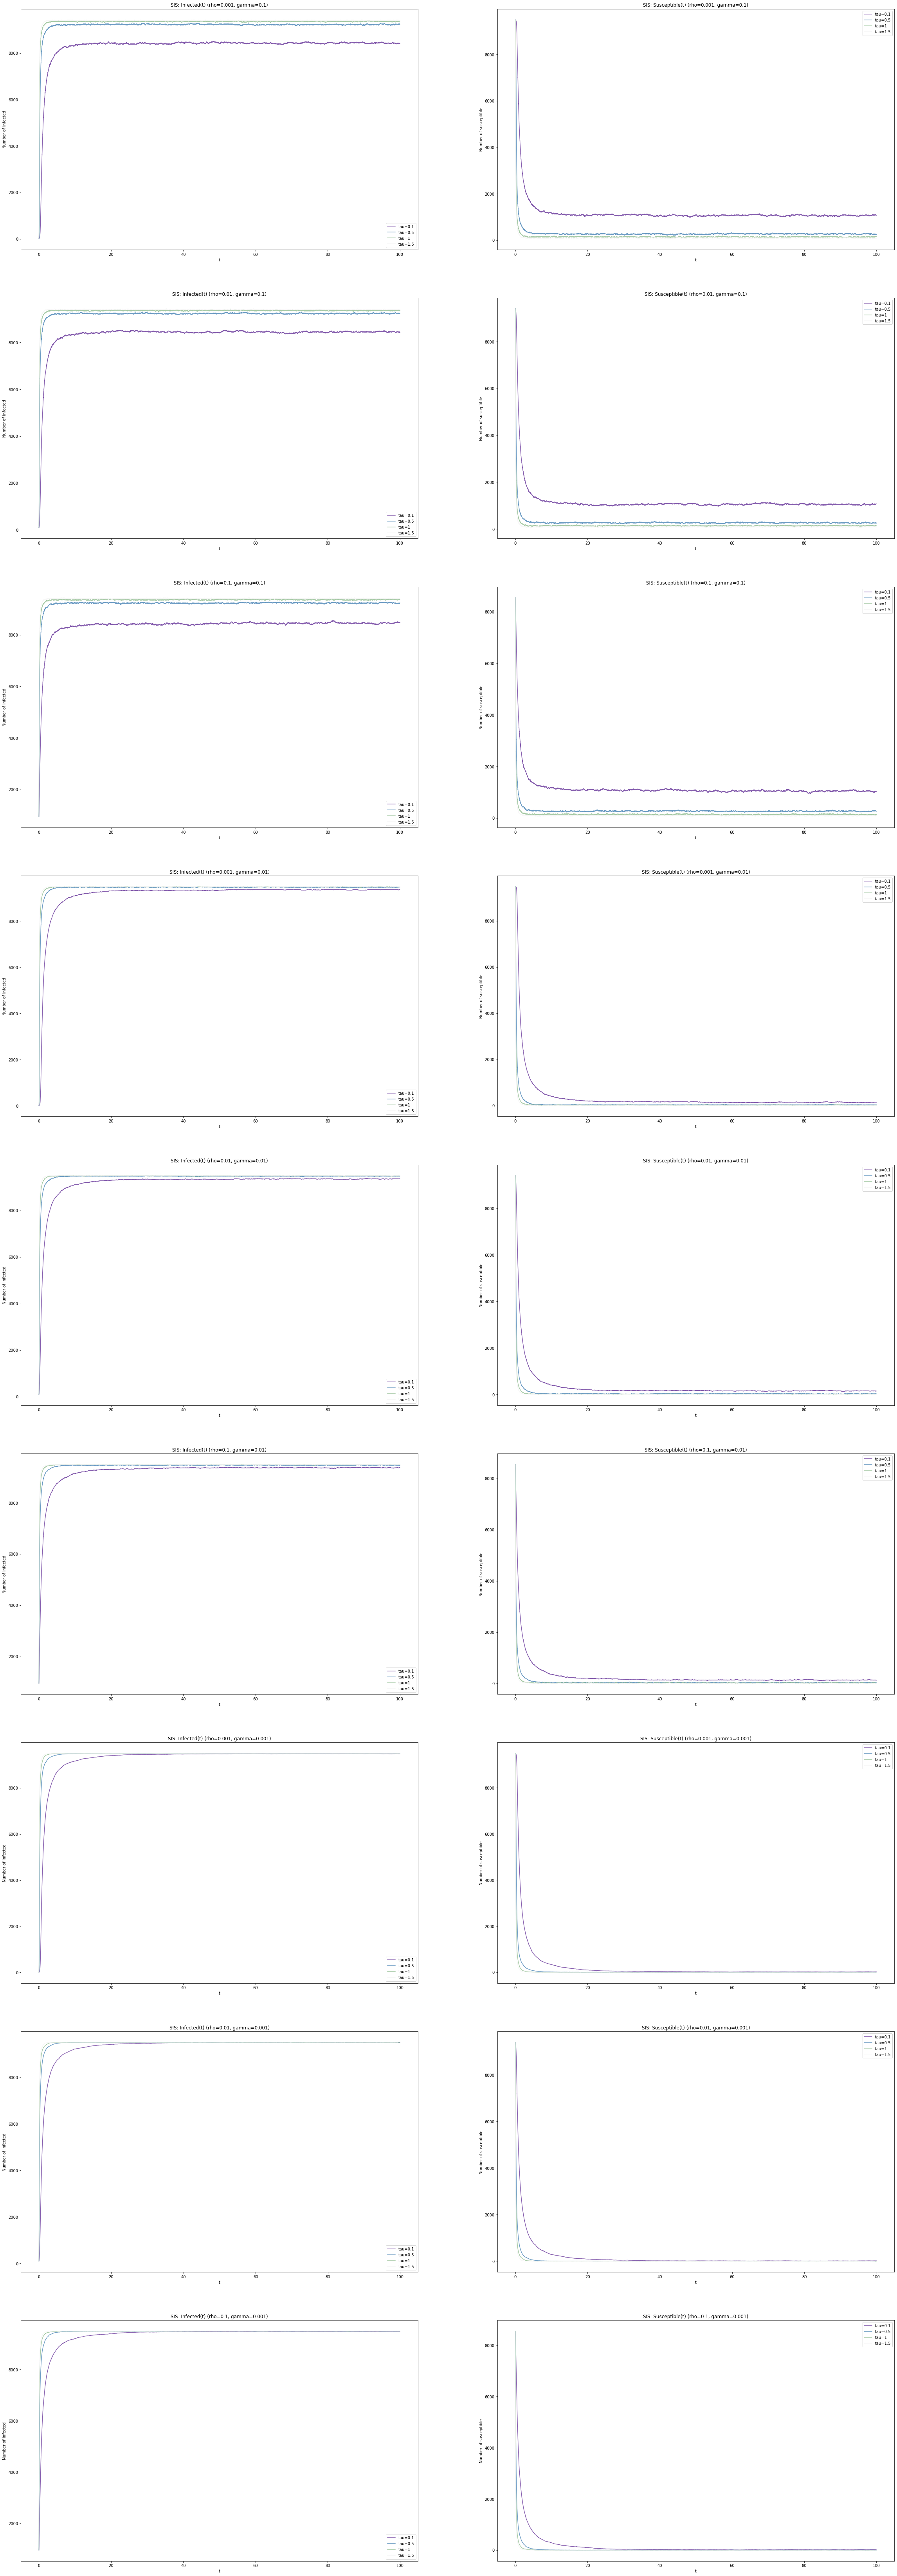

In [69]:
%matplotlib inline
taus = [0.1,0.5,1,1.5] # transmission rate
rhos = [0.001,0.01,0.1] # random fraction initially infected
gammas = [0.1,0.01,0.001] # recovery rate

gammas_and_rhos = list(itertools.product(gammas, rhos))

fig, axs = plt.subplots(len(rhos)*len(gammas),2)
fig.set_size_inches(40, 120)

for i,(gamma,rho) in enumerate(gammas_and_rhos):
    axs[i][0].set_title(f"SIS: Infected(t) (rho={rho}, gamma={gamma})")
    axs[i][0].set_xlabel("t")
    axs[i][0].set_ylabel("Number of infected")

    axs[i][1].set_title(f"SIS: Susceptible(t) (rho={rho}, gamma={gamma})")
    axs[i][1].set_xlabel("t")
    axs[i][1].set_ylabel("Number of susceptible")
    
for i,(gamma,rho) in enumerate(gammas_and_rhos): 
    for j,tau in enumerate(taus): 
        t, S, I = eon.Gillespie_SIS(G, tau=tau, gamma=gamma, rho=rho)
        axs[i][0].plot(t, I, color = colors[j], label=f"tau={tau}", alpha=0.8)
        axs[i][1].plot(t, S, color = colors[j], label=f"tau={tau}", alpha=0.8)
        axs[i][0].legend()
        axs[i][1].legend()
        
plt.show()

### Vizualization for connected subgraph of the network

In [95]:
s = G.subgraph(list(range(300)))
scc = sorted(nx.connected_components(s), key=len, reverse=True)
max_scc = G.subgraph(scc[0])

In [96]:
len(max_scc)

100

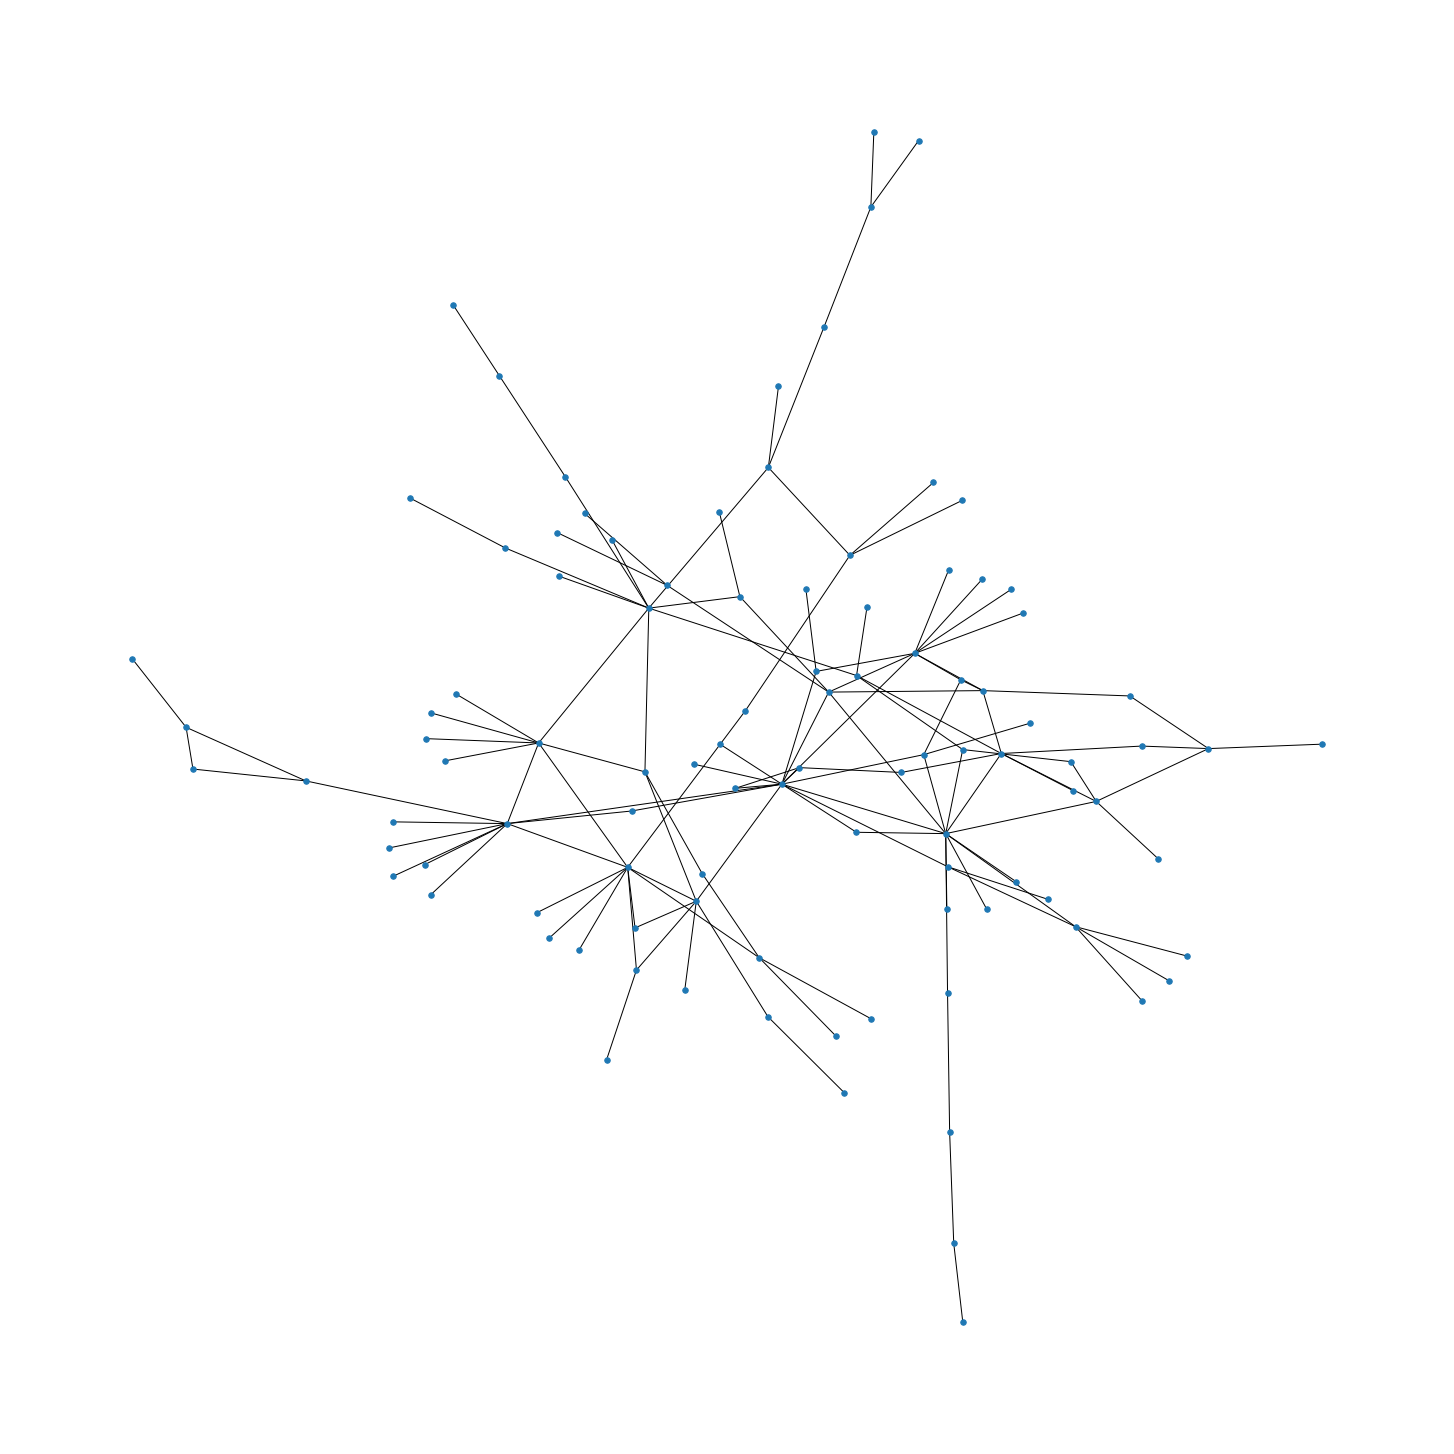

In [116]:
plt.figure(figsize=(20,20))
nx.draw(max_scc,node_size=30,pos=nx.spring_layout(max_scc))

#### SIR

In [148]:
tau = 0.3
gamma = 0.1
sir_data = eon.Gillespie_SIR(max_scc, tau, gamma, return_full_data=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
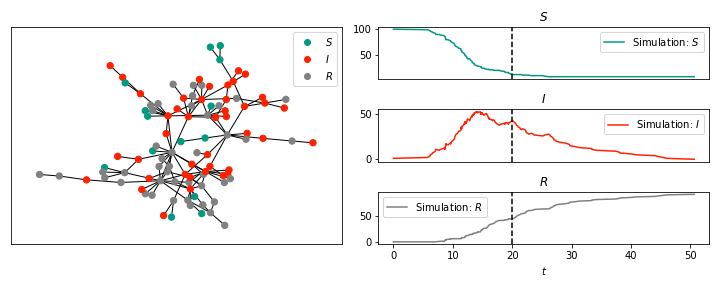

In [156]:
%matplotlib widget
sir_data.display(20, node_size=40)  
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
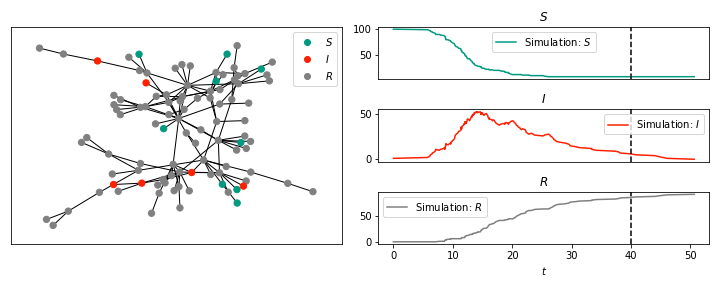

In [157]:
%matplotlib widget
sir_data.display(40, node_size=40)  
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
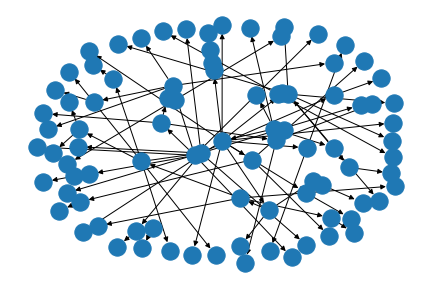

In [158]:
%matplotlib widget
nx.draw(sir_data.transmission_tree())

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
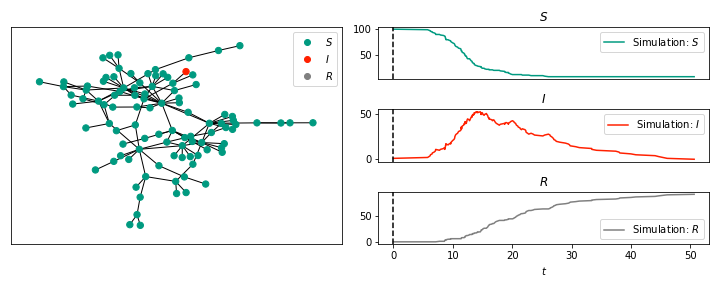

In [161]:
## animation of the disease spread
%matplotlib widget
sir_data.animate(node_size=40)
plt.show()

#### SIS

In [165]:
tau = 0.2
gamma = 0.1
sis_data = eon.Gillespie_SIS(max_scc, tau, gamma, return_full_data=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
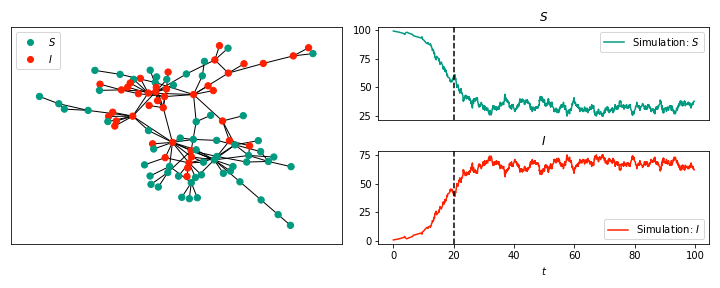

In [166]:
%matplotlib widget
sis_data.display(20, node_size=40)  
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
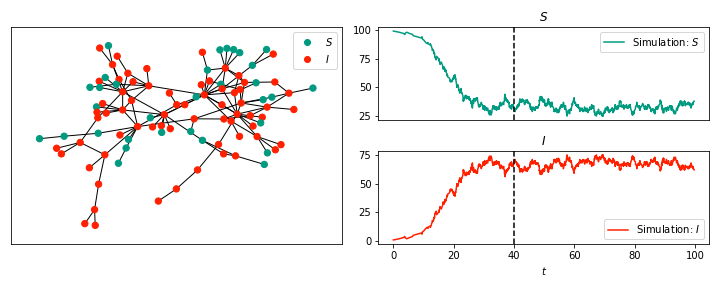

In [167]:
%matplotlib widget
sis_data.display(40, node_size=40)  
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
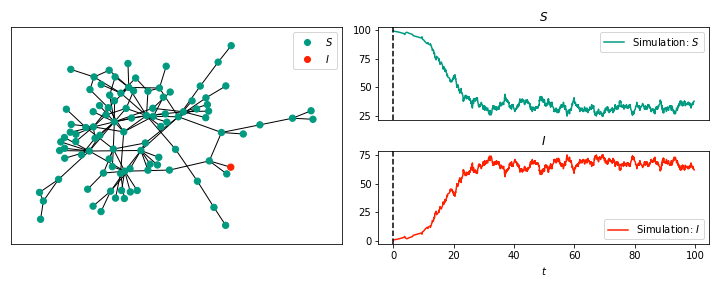

In [170]:
## animation of the disease spread
%matplotlib widget
sis_data.animate(node_size=40)
plt.show()